In [ ]:
# # Install Ultralytics YOLOv8 Library

# !pip install ultralytics
# !pip install -U ultralytics

!pip install -U ultralytics




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
!nvidia-smi


Wed Mar  5 07:34:40 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:

# # Import Required Libraries
from ultralytics import YOLO
import shutil
import os
# Load a pre-trained YOLOv8 model

model_before_fine_tune = YOLO('yolov8n.pt')  # yolov8n.pt is the nano version, suitable for quick training


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 102MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# creating the yaml file
data_yaml="""train: /content/drive/MyDrive/yoloDataset/dataset/train/images

val: /content/drive/MyDrive/yoloDataset/dataset/val/images

test: /content/drive/MyDrive/yoloDataset/dataset/test/images

nc: 2
names: ['Book', 'Smart Phone']

  """
with open('/content/data.yaml', 'w') as f:
    f.write(data_yaml)
print("data.yaml created at /content/data.yaml")

data.yaml created at /content/data.yaml


In [ ]:
import os

# Paths to your dataset
train_images = "/content/drive/MyDrive/yoloDataset/dataset/train/images"
train_labels = "/content/drive/MyDrive/yoloDataset/dataset/train/labels"
val_images = "/content/drive/MyDrive/yoloDataset/dataset/val/images"
val_labels = "/content/drive/MyDrive/yoloDataset/dataset/val/labels"

# Check number of images and labels
print("Training Images:", len(os.listdir(train_images)))
print("Training Labels:", len(os.listdir(train_labels)))
print("Validation Images:", len(os.listdir(val_images)))
print("Validation Labels:", len(os.listdir(val_labels)))

# Check for mismatched files
train_image_files = {os.path.splitext(f)[0] for f in os.listdir(train_images) if f.endswith('.jpg')}
train_label_files = {os.path.splitext(f)[0] for f in os.listdir(train_labels) if f.endswith('.txt')}

missing_train_labels = train_image_files - train_label_files
missing_train_images = train_label_files - train_image_files

print("Missing labels for training images:", missing_train_labels)
print("Missing training images for labels:", missing_train_images)


Training Images: 327
Training Labels: 327
Validation Images: 41
Validation Labels: 41
Missing labels for training images: set()
Missing training images for labels: set()


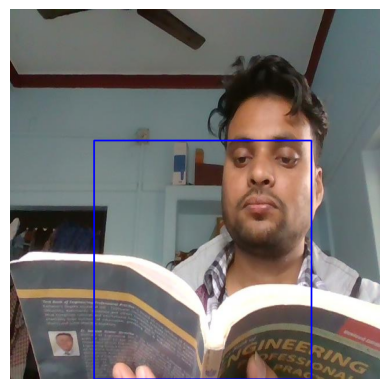

In [ ]:

#checking
import cv2
import matplotlib.pyplot as plt

# Sample image and label paths
image_path = "/content/drive/MyDrive/yoloDataset/dataset/train/images/Book_01121e67-edd7-11ef-a052-e0c26493e36e_jpg.rf.f13ae6cf219e64df13941eaa6748244e.jpg"
label_path = "/content/drive/MyDrive/yoloDataset/dataset/train/labels/Book_02314afc-eddd-11ef-8905-e0c26493e36e_jpg.rf.f36a4d5a9d195d8a527d757093d1ea48.txt"
# Load the image
image = cv2.imread(image_path)

# Read the label file
with open(label_path, 'r') as file:
    labels = file.readlines()

# Loop through the labels and draw bounding boxes
for label in labels:
    class_id, x_center, y_center, width, height = map(float, label.strip().split())

    # Convert normalized coordinates to actual pixel values
    h, w, _ = image.shape
    x_center *= w
    y_center *= h
    width *= w
    height *= h

    # Convert from center to top-left corner
    xmin = int(x_center - width / 2)
    ymin = int(y_center - height / 2)
    xmax = int(x_center + width / 2)
    ymax = int(y_center + height / 2)

    # Draw the bounding box (using OpenCV, color: red, thickness: 2)
    image = cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

# Convert BGR image to RGB for matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()


In [ ]:
import os
import matplotlib.pyplot as plt
import cv2

In [ ]:
#for checking the model before fine tune the yolo model
# Define project path inside Google Drive
project_path = "/content/drive/MyDrive/yoloDataset/result_before_fine_tune"

metrics = model_before_fine_tune.val(data='/content/data.yaml', project=project_path, device='cuda' )      # Save under a specific folder device='cuda')

# Print individual metrics
print(f"mAP50: {metrics.box.map:.4f}")
print(f"mAP50-95: {metrics.box.map50:.4f}")
print(f"Precision: {metrics.box.mp:.4f}")
print(f"Recall: {metrics.box.mr:.4f}")




Ultralytics 8.3.83 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 21.1MB/s]
val: Scanning /content/drive/MyDrive/yoloDataset/dataset/val/labels.cache... 41 images, 2 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.67s/it]


                   all         41         39      0.564      0.194     0.0421     0.0127
                person         18         18      0.129      0.389     0.0843     0.0254
               bicycle         21         21          1          0          0          0
Speed: 2.8ms preprocess, 6.3ms inference, 0.0ms loss, 8.9ms postprocess per image
Results saved to /content/drive/MyDrive/yoloDataset/result_before_fine_tune/val2
mAP50: 0.0127
mAP50-95: 0.0421
Precision: 0.5644
Recall: 0.1944


Using device: cuda

image 1/1 /content/drive/MyDrive/yoloDataset/dataset/test/images/Phone_825673a2-edd6-11ef-b080-e0c26493e36e_jpg.rf.b2930d0981ada76290615f5db7740f3f.jpg: 640x640 1 person, 1 tv, 1 cell phone, 7.9ms
Speed: 2.1ms preprocess, 7.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Detected classes: [0, 67, 62]


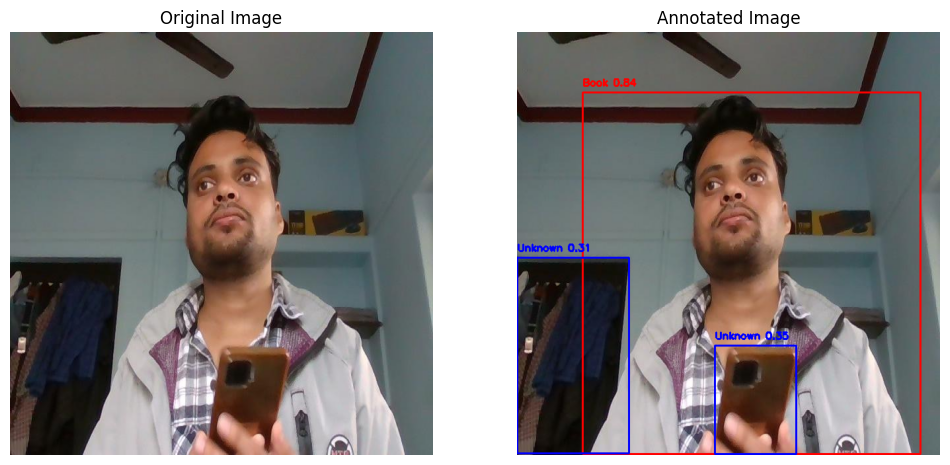

In [ ]:


import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO  # Ensure you import YOLO

# # Load YOLO model
# model = YOLO('/content/drive/MyDrive/yoloDataset/dataset/result/best_model6/weights/best.pt')  # Adjust model file if using a different version
# Load YOLO model
# model = YOLO('yolov8n.pt')  # Adjust model file if using a different version

# Select device (GPU if available)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Load the image for annotation
image_path = '/content/drive/MyDrive/yoloDataset/dataset/test/images/Phone_825673a2-edd6-11ef-b080-e0c26493e36e_jpg.rf.b2930d0981ada76290615f5db7740f3f.jpg'
original_image = cv2.imread(image_path)

# Ensure image is correctly loaded
if original_image is None:
    raise ValueError("Error loading image. Check the file path.")

original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Run prediction on the image
results = model_before_fine_tune.predict(
    source=image_path,
    conf=0.15,  # Confidence threshold
    iou=0.06,  # IoU threshold
    save=False,
    save_crop=False,
    device=device,  # Use selected device
)

# Class IDs
class_labels = {0: 'Book', 1: 'Smart Phone'}  # Define class labels
class_colors = {0: (255, 0, 0), 1: (0, 255, 0)}  # Red for book, green for phone

# Copy original image for annotation
annotated_image = original_image.copy()

# Annotate the image
for result in results:
    # **Fix: Clone tensors before converting to NumPy**
    class_ids = result.boxes.cls.clone().cpu().numpy().astype(int) if isinstance(result.boxes.cls, torch.Tensor) else np.array(result.boxes.cls, dtype=int)
    boxes = result.boxes.xyxy.clone().cpu().numpy() if isinstance(result.boxes.xyxy, torch.Tensor) else np.array(result.boxes.xyxy)
    confidences = result.boxes.conf.clone().cpu().numpy() if isinstance(result.boxes.conf, torch.Tensor) else np.array(result.boxes.conf)

    print(f"Detected classes: {class_ids.tolist()}")  # Debugging

    for box, cls, conf in zip(boxes, class_ids, confidences):
        xmin, ymin, xmax, ymax = map(int, box.tolist())
        class_id = int(cls)

        # Ensure class_id exists in dictionary, otherwise default to unknown
        label = class_labels.get(class_id, "Unknown")
        color = class_colors.get(class_id, (0, 0, 255))  # Default to blue for unknown

        # Draw bounding box and label
        cv2.rectangle(annotated_image, (xmin, ymin), (xmax, ymax), color, 2)
        cv2.putText(annotated_image, f'{label} {conf:.2f}', (xmin, ymin - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Display input and annotated images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(annotated_image)
axes[1].set_title("Annotated Image")
axes[1].axis("off")

plt.show()



In [ ]:
# # # #afor the fine tuned of the model
# model_before_fine_tune.train(
#     data='data.yaml',        # Path to your data.yaml file
#     epochs=200,                # Number of epochs
#     batch=8,                 # Increase batch size for better GPU utilization
#     imgsz=640,               # Image size
#     save=True,               # Save the model
#     save_period=-1,          # Save only the best model
#     cache='ram',             # Use RAM-based caching for faster data loading
#     device='cuda',           # Use GPU (T4 on Colab)
#     workers=2,               # Increase dataloader workers for speed
#     project='/content/drive/MyDrive/yoloDataset/result',        # Output directory       # Experiment name
#     multi_scale=False,       # Disable multi-scale training
#     augment=True             # Enable data augmentation
# )


model_before_fine_tune.train(
    data='data.yaml',        # Path to dataset configuration file
    epochs=200,              # Number of epochs
    batch=16,                # Adjust based on GPU memory (T4 can handle 16)
    imgsz=640,               # Image size (640 is optimal for most cases)
    save=True,               # Save model checkpoints
    save_period=50,           # Save model every 5 epochs
    device='cuda',           # Use GPU for training
    workers=4,               # Increase for faster data loading
    project='/content/drive/MyDrive/yoloDataset/',  # Path to save results
    name='resut', # Experiment name
    multi_scale=False,       # Disable multi-scale training for stability
    augment=True,            # Enable data augmentation
    optimizer='AdamW',       # Use AdamW optimizer (better for convergence)
    dropout=0.1,             # Prevent overfitting
    lr0=0.001,               # Initial learning rate
    lrf=0.1,                 # Final learning rate factor
    momentum=0.937,          # Momentum for optimizer
    weight_decay=0.0005,     # Regularization to prevent overfitting
    warmup_epochs=3.0,       # Gradual learning rate increase
    warmup_momentum=0.8,     # Initial momentum during warmup
    warmup_bias_lr=0.1,      # Warmup learning rate for bias layers
    box=7.5,                 # Box loss gain
    cls=0.5,                 # Corrected classification loss weight
    iou=0.2,                 # IoU loss gain (lower helps with small objects)
    hsv_h=0.015,             # Hue augmentation
    hsv_s=0.7,               # Saturation augmentation
    hsv_v=0.4,               # Value augmentation
    degrees=0.0,             # Rotation augmentation
    translate=0.1,           # Translate augmentation
    scale=0.5,               # Scale augmentation
    shear=0.0,               # Shear augmentation
    perspective=0.0,         # Perspective augmentation
    flipud=0.0,              # Vertical flip probability
    fliplr=0.5,              # Horizontal flip probability
    mosaic=1.0,              # Enable mosaic augmentation
    mixup=0.0,               # Disable mixup augmentation
    label_smoothing=0.1,     # Label smoothing
              # Early stopping patience (stops if no improvement)
    resume=  False ,            # Restart training from last checkpoint
    amp=True                 # Enable mixed precision training for better performance
)




# model_before_fine_tune.train(
#     data='data.yaml',        # Path to dataset configuration file
#     epochs=200,              # Number of epochs
#     batch=16,                # Adjust based on GPU memory (T4 can handle 16)
#     imgsz=640,               # Image size (640 is optimal for most cases)
#     save=True,               # Save model checkpoints
#     save_period=50,           # Save model every 5 epochs
#     device='cuda',           # Use GPU for training
#     workers=4,               # Increase for faster data loading
#     project='/content/drive/MyDrive/yoloDataset/',  # Path to save results
#     name='resut', # Experiment name
#     multi_scale=False,       # Disable multi-scale training for stability
#     augment=True,            # Enable data augmentation
#     optimizer='AdamW',       # Use AdamW optimizer (better for convergence)
#     dropout=0.1,             # Prevent overfitting
#     lr0=0.001,               # Initial learning rate
#     lrf=0.1,                 # Final learning rate factor
#     momentum=0.937,          # Momentum for optimizer
#     weight_decay=0.0005,     # Regularization to prevent overfitting
#     warmup_epochs=3.0,       # Gradual learning rate increase
#     warmup_momentum=0.8,     # Initial momentum during warmup
#     warmup_bias_lr=0.1,      # Warmup learning rate for bias layers
#     box=7.5,                 # Box loss gain
#     cls=0.5,                 # Corrected classification loss weight
#     iou=0.2,                 # IoU loss gain (lower helps with small objects)
#     hsv_h=0.015,             # Hue augmentation
#     hsv_s=0.7,               # Saturation augmentation
#     hsv_v=0.4,               # Value augmentation
#     degrees=0.0,             # Rotation augmentation
#     translate=0.1,           # Translate augmentation
#     scale=0.5,               # Scale augmentation
#     shear=0.0,               # Shear augmentation
#     perspective=0.0,         # Perspective augmentation
#     flipud=0.0,              # Vertical flip probability
#     fliplr=0.5,              # Horizontal flip probability
#     mosaic=1.0,              # Enable mosaic augmentation
#     mixup=0.0,               # Disable mixup augmentation
#     label_smoothing=0.1,     # Label smoothing
#               # Early stopping patience (stops if no improvement)
#     resume=  False ,            # Restart training from last checkpoint
#     amp=True                 # Enable mixed precision training for better performance
# )


WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.83 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=50, cache=False, device=cuda, workers=4, project=/content/drive/MyDrive/yoloDataset/, name=resut2, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.2, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fals

100%|██████████| 5.35M/5.35M [00:00<00:00, 93.6MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/yoloDataset/dataset/train/labels... 327 images, 4 backgrounds, 1 corrupt: 100%|██████████| 327/327 [02:14<00:00,  2.42it/s]

train: WARNING ⚠️ /content/drive/MyDrive/yoloDataset/dataset/train/images/Book_1a1586ca-eddd-11ef-b176-e0c26493e36e_jpg.rf.75b67f9522878812ad413b81e1d76627.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1


train: New cache created: /content/drive/MyDrive/yoloDataset/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/yoloDataset/dataset/val/labels.cache... 41 images, 2 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/yoloDataset/resut2/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yoloDataset/resut2
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.05G      2.596      3.413      2.566         11        640: 100%|██████████| 21/21 [00:07<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         41         39     0.0186      0.298     0.0249    0.00481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      2.08G       1.78      2.367      1.944         15        640: 100%|██████████| 21/21 [00:07<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all         41         39     0.0168      0.321     0.0263    0.00412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.08G      1.728      2.147      1.895         16        640: 100%|██████████| 21/21 [00:06<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         41         39      0.144      0.274      0.116      0.065



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.01G      1.501      1.799      1.743         11        640: 100%|██████████| 21/21 [00:05<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         41         39      0.252      0.238      0.193     0.0987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200         2G      1.541      1.746      1.776         18        640: 100%|██████████| 21/21 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         41         39      0.593      0.401      0.494      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.09G      1.441      1.639      1.696         13        640: 100%|██████████| 21/21 [00:05<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         41         39      0.729      0.639      0.704      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.01G      1.416      1.534      1.655         12        640: 100%|██████████| 21/21 [00:07<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

                   all         41         39      0.827      0.742      0.817      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.01G      1.328      1.382      1.575         10        640: 100%|██████████| 21/21 [00:05<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         41         39      0.805      0.671      0.754      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200         2G      1.376      1.374      1.613          9        640: 100%|██████████| 21/21 [00:06<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         41         39      0.701      0.877      0.809      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      2.08G      1.237      1.336      1.531         12        640: 100%|██████████| 21/21 [00:06<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         41         39      0.895      0.823      0.857      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      2.01G       1.21       1.23      1.482         12        640: 100%|██████████| 21/21 [00:05<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         41         39       0.82       0.82      0.838      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.01G      1.197       1.28      1.486         11        640: 100%|██████████| 21/21 [00:07<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]


                   all         41         39      0.869      0.877      0.908      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200         2G      1.175      1.189       1.47         11        640: 100%|██████████| 21/21 [00:05<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         41         39      0.908      0.853      0.889      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.09G      1.238      1.132      1.482         15        640: 100%|██████████| 21/21 [00:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         41         39      0.797      0.806      0.838      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      2.01G      1.225      1.143      1.478         10        640: 100%|██████████| 21/21 [00:06<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         41         39      0.747      0.852      0.843      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.01G      1.174        1.1      1.441         15        640: 100%|██████████| 21/21 [00:05<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         41         39      0.887      0.893      0.934      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200         2G      1.148      1.082      1.441         19        640: 100%|██████████| 21/21 [00:07<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         41         39      0.819      0.849      0.904      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.09G      1.165      1.155      1.434         18        640: 100%|██████████| 21/21 [00:05<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         41         39      0.915      0.736      0.892       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      2.01G      1.135      1.059      1.436         10        640: 100%|██████████| 21/21 [00:07<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         41         39       0.85      0.872      0.881      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.01G      1.079      1.048      1.402         14        640: 100%|██████████| 21/21 [00:05<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         41         39      0.866      0.941      0.942        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200         2G      1.103      1.013      1.386         16        640: 100%|██████████| 21/21 [00:05<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         41         39      0.895      0.822      0.893      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      2.08G      1.086     0.9714       1.36         17        640: 100%|██████████| 21/21 [00:06<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         41         39      0.916      0.877      0.914      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.01G      1.075     0.9732      1.378          8        640: 100%|██████████| 21/21 [00:06<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         41         39      0.849      0.949      0.925      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.01G      1.058     0.9462      1.349         11        640: 100%|██████████| 21/21 [00:06<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all         41         39      0.876      0.942      0.922      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200         2G      1.082     0.9475      1.369          9        640: 100%|██████████| 21/21 [00:05<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         41         39      0.895      0.944      0.928      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      2.08G      1.035      0.932      1.349         11        640: 100%|██████████| 21/21 [00:07<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         41         39      0.895      0.925      0.934      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.01G      1.043     0.9078      1.342         12        640: 100%|██████████| 21/21 [00:05<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         41         39       0.85      0.901        0.9      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      2.01G      1.036     0.8753      1.333         11        640: 100%|██████████| 21/21 [00:06<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]

                   all         41         39      0.851      0.897        0.9      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200         2G      1.061     0.9267      1.346         15        640: 100%|██████████| 21/21 [00:06<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         41         39      0.871      0.925      0.943       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.09G     0.9741      0.831      1.294         14        640: 100%|██████████| 21/21 [00:05<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


                   all         41         39      0.868      0.972      0.951      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      2.01G      0.998     0.8448      1.295         13        640: 100%|██████████| 21/21 [00:07<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

                   all         41         39      0.888      0.948      0.939      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      2.01G     0.9263     0.8002      1.249          8        640: 100%|██████████| 21/21 [00:05<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         41         39      0.886      0.948      0.948      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200         2G      1.002     0.8526      1.309          8        640: 100%|██████████| 21/21 [00:06<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all         41         39      0.891      0.925      0.934      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.08G      1.034     0.8784      1.308         10        640: 100%|██████████| 21/21 [00:05<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         41         39      0.857      0.901        0.9      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      2.01G     0.9764     0.8448      1.293         11        640: 100%|██████████| 21/21 [00:06<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         41         39      0.885      0.853      0.888      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      2.01G     0.9562      0.843      1.281          9        640: 100%|██████████| 21/21 [00:05<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         41         39      0.831      0.918      0.905      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200         2G     0.9606     0.8205      1.299         14        640: 100%|██████████| 21/21 [00:05<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]

                   all         41         39      0.863      0.916      0.953      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      2.08G     0.9624     0.8372      1.282          9        640: 100%|██████████| 21/21 [00:07<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         41         39      0.879      0.948      0.954      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      2.01G     0.9725     0.8451      1.308         15        640: 100%|██████████| 21/21 [00:05<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         41         39      0.919      0.948      0.962      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      2.01G     0.9792     0.8298      1.293         10        640: 100%|██████████| 21/21 [00:07<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         41         39      0.922      0.948      0.952       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200         2G     0.9329     0.7979      1.275         10        640: 100%|██████████| 21/21 [00:05<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all         41         39      0.883      0.933      0.953      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      2.08G      0.948      0.798      1.288         15        640: 100%|██████████| 21/21 [00:06<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         41         39      0.889       0.87      0.918      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      2.01G     0.9565     0.8119      1.288         10        640: 100%|██████████| 21/21 [00:06<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         41         39      0.881      0.925      0.952      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      2.01G     0.9165     0.7844       1.25         15        640: 100%|██████████| 21/21 [00:05<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         41         39      0.841      0.924       0.92      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200         2G     0.9098     0.7419       1.26          8        640: 100%|██████████| 21/21 [00:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         41         39      0.886      0.943       0.95      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      2.08G     0.8739     0.7849      1.245         15        640: 100%|██████████| 21/21 [00:05<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         41         39      0.859      0.898      0.925      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      2.01G     0.8972     0.7564      1.245         11        640: 100%|██████████| 21/21 [00:06<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         41         39      0.818      0.935      0.945      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      2.01G     0.9056     0.7433      1.252         10        640: 100%|██████████| 21/21 [00:05<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         41         39      0.916      0.901      0.952      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200         2G     0.9034     0.6746      1.232          8        640: 100%|██████████| 21/21 [00:06<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         41         39        0.9      0.972      0.947      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      2.08G     0.8926     0.7332      1.242         14        640: 100%|██████████| 21/21 [00:06<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         41         39       0.89      0.972       0.94      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      2.01G      0.898     0.7303      1.228         12        640: 100%|██████████| 21/21 [00:05<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         41         39      0.898      0.972      0.943      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      2.01G     0.8546     0.6981      1.224         12        640: 100%|██████████| 21/21 [00:07<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all         41         39      0.904      0.972       0.94      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200         2G      0.865     0.7074      1.219         17        640: 100%|██████████| 21/21 [00:05<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]


                   all         41         39       0.93       0.97       0.95      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      2.09G     0.9161     0.7469      1.221         16        640: 100%|██████████| 21/21 [00:08<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         41         39      0.932      0.972      0.961       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      2.01G     0.8981     0.7192      1.233         13        640: 100%|██████████| 21/21 [00:05<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         41         39      0.886      0.948      0.942      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.01G     0.8748     0.7072      1.205         10        640: 100%|██████████| 21/21 [00:06<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all         41         39      0.903      0.925      0.904       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200         2G     0.8807     0.7106      1.222         14        640: 100%|██████████| 21/21 [00:05<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         41         39      0.921      0.948      0.935      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      2.08G     0.8813     0.7194       1.21         13        640: 100%|██████████| 21/21 [00:05<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         41         39      0.884      0.929      0.939      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      2.01G     0.9005     0.7489      1.244         11        640: 100%|██████████| 21/21 [00:07<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         41         39      0.897      0.907       0.92      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      2.01G      0.868     0.7052      1.208         11        640: 100%|██████████| 21/21 [00:05<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all         41         39      0.883      0.931      0.922      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200         2G     0.8678     0.6985      1.224         11        640: 100%|██████████| 21/21 [00:07<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         41         39      0.889      0.926      0.927      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      2.08G     0.8728     0.6839      1.209         11        640: 100%|██████████| 21/21 [00:05<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         41         39      0.875      0.972       0.92       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      2.01G     0.8354     0.6677      1.199         15        640: 100%|██████████| 21/21 [00:06<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         41         39      0.883      0.942      0.939      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      2.01G     0.8192     0.6473      1.199         13        640: 100%|██████████| 21/21 [00:05<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         41         39      0.905      0.969      0.947      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200         2G     0.8331     0.7141      1.213         12        640: 100%|██████████| 21/21 [00:05<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         41         39      0.888      0.943      0.934      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      2.09G     0.8618     0.6984      1.218         14        640: 100%|██████████| 21/21 [00:06<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         41         39       0.91      0.972      0.953      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      2.01G     0.8018     0.6749      1.198         12        640: 100%|██████████| 21/21 [00:05<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         41         39      0.903      0.948      0.955      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      2.01G     0.8406     0.6858      1.202         12        640: 100%|██████████| 21/21 [00:07<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         41         39      0.893      0.948      0.944      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200         2G     0.8013     0.6799      1.176         16        640: 100%|██████████| 21/21 [00:05<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]

                   all         41         39      0.902      0.948      0.932      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      2.09G     0.7951     0.6313      1.152         17        640: 100%|██████████| 21/21 [00:07<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]

                   all         41         39      0.929       0.97      0.947      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      2.01G     0.8298     0.6541      1.182         14        640: 100%|██████████| 21/21 [00:05<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         41         39      0.899      0.967      0.942      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      2.01G      0.807     0.6851      1.185         10        640: 100%|██████████| 21/21 [00:06<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         41         39      0.887       0.99      0.951      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200         2G     0.8064     0.6373      1.175         13        640: 100%|██████████| 21/21 [00:06<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         41         39      0.877      0.948       0.95      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      2.08G     0.8139     0.6354      1.182          8        640: 100%|██████████| 21/21 [00:05<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all         41         39      0.923      0.915      0.947      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      2.01G     0.7675     0.6192      1.149          7        640: 100%|██████████| 21/21 [00:07<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         41         39       0.92      0.919      0.916      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      2.01G     0.8305     0.6533       1.19         15        640: 100%|██████████| 21/21 [00:05<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         41         39      0.933      0.948      0.941      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200         2G     0.7798     0.5887      1.178         10        640: 100%|██████████| 21/21 [00:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         41         39      0.931      0.953      0.945      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      2.08G     0.7871     0.6286      1.162         15        640: 100%|██████████| 21/21 [00:05<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         41         39      0.921       0.97      0.949      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.01G     0.8003     0.6778      1.179         11        640: 100%|██████████| 21/21 [00:06<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         41         39      0.923      0.972      0.945      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      2.01G     0.7815      0.653      1.182          8        640: 100%|██████████| 21/21 [00:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         41         39       0.91      0.948      0.931      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200         2G     0.7805      0.618      1.167          8        640: 100%|██████████| 21/21 [00:05<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         41         39      0.908      0.966      0.942      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      2.08G      0.752     0.5849      1.138          9        640: 100%|██████████| 21/21 [00:07<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]

                   all         41         39      0.895      0.972      0.919      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      2.01G     0.7706     0.6176      1.146         10        640: 100%|██████████| 21/21 [00:05<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         41         39      0.862      0.963      0.914      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      2.01G     0.7727     0.5895       1.14          9        640: 100%|██████████| 21/21 [00:07<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         41         39      0.869      0.922      0.896      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200         2G     0.7669     0.5999      1.149         16        640: 100%|██████████| 21/21 [00:07<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         41         39      0.897      0.943      0.915      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      2.08G     0.7425      0.613      1.138         14        640: 100%|██████████| 21/21 [00:05<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         41         39       0.91      0.925      0.924      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      2.01G     0.7907     0.6155      1.152         12        640: 100%|██████████| 21/21 [00:07<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         41         39      0.905      0.948      0.933      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      2.01G     0.7507     0.5749      1.129         12        640: 100%|██████████| 21/21 [00:05<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all         41         39      0.927       0.97      0.938      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200         2G     0.7663     0.6237      1.151         11        640: 100%|██████████| 21/21 [00:07<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         41         39      0.931      0.938      0.942      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      2.08G     0.7639     0.6134      1.157         17        640: 100%|██████████| 21/21 [00:05<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

                   all         41         39      0.893      0.895      0.926      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      2.01G     0.7701      0.631      1.155         13        640: 100%|██████████| 21/21 [00:06<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         41         39      0.922      0.972      0.927      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      2.01G     0.7397     0.5934      1.136         16        640: 100%|██████████| 21/21 [00:05<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         41         39      0.903      0.972      0.924       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200         2G     0.7282     0.5625      1.131          8        640: 100%|██████████| 21/21 [00:05<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         41         39      0.914      0.969      0.931      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      2.08G     0.7587     0.6212      1.145         12        640: 100%|██████████| 21/21 [00:07<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         41         39      0.924       0.97      0.939      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      2.01G     0.7427     0.5868      1.158         14        640: 100%|██████████| 21/21 [00:05<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         41         39        0.9      0.946       0.93      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      2.01G     0.7311     0.5876      1.127         14        640: 100%|██████████| 21/21 [00:07<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         41         39        0.9      0.948      0.929      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200         2G     0.7365     0.5782      1.139         12        640: 100%|██████████| 21/21 [00:05<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all         41         39      0.899       0.94      0.916       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      2.08G     0.7129     0.5574      1.109         15        640: 100%|██████████| 21/21 [00:06<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         41         39      0.934      0.967      0.944       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      2.01G     0.7346     0.5664      1.127         15        640: 100%|██████████| 21/21 [00:05<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         41         39      0.931      0.948       0.93      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      2.01G     0.7159     0.5638      1.124          9        640: 100%|██████████| 21/21 [00:05<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         41         39      0.878      0.948      0.913      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200         2G     0.6725     0.5524      1.108         11        640: 100%|██████████| 21/21 [00:06<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         41         39      0.904      0.948      0.912      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      2.09G     0.7557     0.5802      1.137         19        640: 100%|██████████| 21/21 [00:05<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         41         39       0.89      0.948      0.915      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      2.01G     0.7036     0.5737      1.124          8        640: 100%|██████████| 21/21 [00:06<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         41         39      0.891      0.948      0.921      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      2.01G     0.6992      0.563      1.119         13        640: 100%|██████████| 21/21 [00:05<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         41         39      0.954      0.932      0.935      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200         2G      0.708     0.5533      1.112         12        640: 100%|██████████| 21/21 [00:06<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all         41         39      0.933      0.919      0.919      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      2.08G     0.6752     0.5461      1.107         10        640: 100%|██████████| 21/21 [00:06<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         41         39      0.899      0.945      0.912      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      2.01G     0.7443     0.5901      1.145         12        640: 100%|██████████| 21/21 [00:05<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

                   all         41         39      0.927      0.972      0.929      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      2.01G      0.705     0.5794      1.103         16        640: 100%|██████████| 21/21 [00:07<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         41         39      0.887      0.968      0.947      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200         2G     0.7184     0.5534      1.133         11        640: 100%|██████████| 21/21 [00:05<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         41         39      0.879      0.961      0.963      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      2.09G     0.7027     0.5532      1.112         14        640: 100%|██████████| 21/21 [00:07<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         41         39      0.879      0.991      0.952      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      2.01G     0.6982     0.5476      1.112         16        640: 100%|██████████| 21/21 [00:05<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         41         39      0.895      0.993      0.947      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      2.01G     0.6869     0.5525      1.106          9        640: 100%|██████████| 21/21 [00:06<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]

                   all         41         39      0.899      0.963      0.938      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200         2G     0.6739     0.5421      1.089         14        640: 100%|██████████| 21/21 [00:06<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         41         39      0.936      0.954       0.94      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      2.08G     0.6659     0.4956      1.093          8        640: 100%|██████████| 21/21 [00:05<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         41         39      0.937      0.971       0.93      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      2.01G     0.6802     0.5579      1.108         10        640: 100%|██████████| 21/21 [00:07<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all         41         39      0.936      0.969      0.926      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      2.01G     0.6864     0.5689      1.104          8        640: 100%|██████████| 21/21 [00:05<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         41         39      0.908      0.967      0.942      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200         2G     0.6766     0.5522      1.097         11        640: 100%|██████████| 21/21 [00:07<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         41         39      0.903      0.937      0.942      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      2.08G     0.6695     0.5621       1.12          7        640: 100%|██████████| 21/21 [00:05<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         41         39      0.883       0.97      0.948      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      2.01G     0.6844     0.5573      1.097         13        640: 100%|██████████| 21/21 [00:06<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         41         39      0.914      0.937      0.951      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      2.01G     0.6328     0.5049      1.085          7        640: 100%|██████████| 21/21 [00:06<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         41         39      0.919      0.962      0.945      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200         2G     0.6515     0.5296      1.088         12        640: 100%|██████████| 21/21 [00:05<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         41         39      0.916      0.969      0.927      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      2.08G     0.6622     0.5525      1.101         10        640: 100%|██████████| 21/21 [00:06<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

                   all         41         39      0.924      0.968      0.918      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      2.01G     0.6585     0.5026      1.078         14        640: 100%|██████████| 21/21 [00:05<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         41         39      0.907       0.97      0.926       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      2.01G     0.6625     0.5343      1.095         18        640: 100%|██████████| 21/21 [00:07<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         41         39      0.894      0.972      0.912      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200         2G     0.6497     0.4963      1.097         11        640: 100%|██████████| 21/21 [00:05<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         41         39       0.89      0.972      0.925      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      2.08G     0.6463     0.5017      1.081         10        640: 100%|██████████| 21/21 [00:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         41         39      0.903      0.972      0.933      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      2.01G     0.6532     0.5118      1.106          6        640: 100%|██████████| 21/21 [00:05<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         41         39      0.911      0.968       0.92      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      2.01G     0.6519     0.5168      1.092         12        640: 100%|██████████| 21/21 [00:05<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

                   all         41         39      0.924      0.972      0.919      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200         2G     0.6383     0.4944      1.078         16        640: 100%|██████████| 21/21 [00:06<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         41         39      0.925      0.972      0.925      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      2.08G     0.6629     0.5399      1.094          8        640: 100%|██████████| 21/21 [00:05<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         41         39      0.918      0.964      0.917      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      2.01G     0.6256      0.502      1.068          9        640: 100%|██████████| 21/21 [00:07<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]


                   all         41         39      0.932      0.972      0.916      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      2.01G     0.6181     0.4538      1.063          8        640: 100%|██████████| 21/21 [00:05<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]

                   all         41         39      0.929      0.972       0.92      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200         2G     0.6163     0.5041      1.061         14        640: 100%|██████████| 21/21 [00:06<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all         41         39      0.929      0.972      0.917       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      2.08G     0.5931     0.4648      1.062          7        640: 100%|██████████| 21/21 [00:05<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         41         39      0.933      0.972      0.934      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      2.01G     0.6482     0.5077      1.077          8        640: 100%|██████████| 21/21 [00:05<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

                   all         41         39      0.933      0.972      0.929      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      2.01G       0.65     0.5267      1.107         15        640: 100%|██████████| 21/21 [00:06<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         41         39      0.907      0.948       0.91      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200         2G     0.6407     0.5121      1.081         12        640: 100%|██████████| 21/21 [00:05<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         41         39      0.906      0.947      0.905      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      2.08G     0.6199     0.5051       1.07         11        640: 100%|██████████| 21/21 [00:07<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         41         39      0.927      0.969      0.924      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      2.01G     0.6189     0.4999      1.084          9        640: 100%|██████████| 21/21 [00:05<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         41         39      0.929      0.972      0.923       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      2.01G     0.6483     0.5175       1.09          8        640: 100%|██████████| 21/21 [00:06<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         41         39      0.928      0.972      0.919      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200         2G     0.5872     0.4756      1.064         13        640: 100%|██████████| 21/21 [00:05<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         41         39      0.923       0.97      0.919      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      2.09G     0.6139     0.4897      1.087         11        640: 100%|██████████| 21/21 [00:06<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         41         39      0.897      0.972       0.93      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      2.01G     0.6114     0.4932      1.074         12        640: 100%|██████████| 21/21 [00:06<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         41         39      0.913      0.972      0.929      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      2.01G     0.6338     0.5056       1.07         14        640: 100%|██████████| 21/21 [00:05<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]

                   all         41         39      0.916      0.971       0.92      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200         2G     0.6214     0.5145      1.076         11        640: 100%|██████████| 21/21 [00:07<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         41         39      0.927      0.972       0.92      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      2.08G     0.6146     0.4603      1.062         12        640: 100%|██████████| 21/21 [00:05<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all         41         39      0.934      0.972      0.921      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      2.01G     0.5837     0.4687      1.038         17        640: 100%|██████████| 21/21 [00:06<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         41         39      0.932      0.972      0.921       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      2.01G     0.5952     0.4669      1.038         12        640: 100%|██████████| 21/21 [00:07<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         41         39      0.926      0.972      0.923      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200         2G      0.584     0.4751      1.038         12        640: 100%|██████████| 21/21 [00:05<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         41         39      0.934      0.972      0.924      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      2.08G     0.6092     0.4731      1.059         10        640: 100%|██████████| 21/21 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]

                   all         41         39      0.934      0.972      0.915      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      2.01G     0.6126     0.4765      1.065          9        640: 100%|██████████| 21/21 [00:05<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         41         39      0.929      0.972      0.913      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      2.01G     0.6244     0.4833      1.068         14        640: 100%|██████████| 21/21 [00:07<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         41         39      0.928      0.972       0.92      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200         2G     0.5705     0.4574      1.045          9        640: 100%|██████████| 21/21 [00:05<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]


                   all         41         39      0.933      0.972      0.921      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      2.09G     0.6072     0.4951      1.057         13        640: 100%|██████████| 21/21 [00:06<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         41         39      0.931      0.972      0.916      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      2.01G     0.6122     0.5057      1.071          9        640: 100%|██████████| 21/21 [00:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         41         39      0.934      0.972      0.919      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      2.01G     0.5866     0.4536      1.065         10        640: 100%|██████████| 21/21 [00:05<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         41         39       0.89      0.972      0.922      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200         2G     0.5895     0.4534      1.047         14        640: 100%|██████████| 21/21 [00:06<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all         41         39      0.881      0.952      0.918      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      2.08G     0.5775     0.4556      1.046         17        640: 100%|██████████| 21/21 [00:05<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         41         39      0.888      0.969      0.918      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      2.01G      0.578     0.4448      1.049         15        640: 100%|██████████| 21/21 [00:06<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         41         39      0.905      0.972      0.923      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      2.01G     0.5801     0.4594      1.049         14        640: 100%|██████████| 21/21 [00:05<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         41         39      0.927       0.97      0.932      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200         2G      0.605     0.4594      1.058         17        640: 100%|██████████| 21/21 [00:06<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         41         39       0.93      0.972      0.934      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      2.08G     0.6181       0.47       1.07         14        640: 100%|██████████| 21/21 [00:06<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         41         39       0.93      0.972      0.925       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      2.01G     0.5893     0.4849      1.049         13        640: 100%|██████████| 21/21 [00:05<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all         41         39      0.913      0.948      0.903      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      2.01G      0.608     0.4757      1.059         13        640: 100%|██████████| 21/21 [00:07<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all         41         39      0.912      0.948      0.896       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200         2G     0.5655     0.4367      1.044         14        640: 100%|██████████| 21/21 [00:05<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         41         39      0.929      0.972      0.913      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      2.08G     0.5561     0.4413      1.033         13        640: 100%|██████████| 21/21 [00:06<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


                   all         41         39      0.927      0.972      0.921      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      2.01G      0.617     0.4793       1.07         12        640: 100%|██████████| 21/21 [00:05<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         41         39      0.927      0.972      0.926       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      2.01G     0.5575     0.4399      1.031         17        640: 100%|██████████| 21/21 [00:06<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]

                   all         41         39      0.933      0.972      0.927      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200         2G     0.5705     0.4388      1.047          9        640: 100%|██████████| 21/21 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         41         39      0.934      0.972      0.938      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      2.09G     0.5481     0.4553      1.028         17        640: 100%|██████████| 21/21 [00:05<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         41         39      0.934      0.972      0.928      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      2.01G     0.5552     0.4739       1.04          9        640: 100%|██████████| 21/21 [00:06<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         41         39      0.932      0.972      0.923      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      2.01G     0.5746     0.4349      1.051         11        640: 100%|██████████| 21/21 [00:05<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         41         39      0.929      0.972      0.922       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200         2G     0.5978      0.512      1.064         10        640: 100%|██████████| 21/21 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         41         39      0.927      0.972      0.917      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      2.09G     0.5822      0.472      1.036         13        640: 100%|██████████| 21/21 [00:05<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         41         39      0.928      0.972      0.913      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      2.01G     0.5405     0.4399      1.036         10        640: 100%|██████████| 21/21 [00:06<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         41         39      0.925      0.972      0.916      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      2.01G     0.5546     0.4591      1.032         16        640: 100%|██████████| 21/21 [00:06<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         41         39      0.921      0.972      0.913       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200         2G     0.5639     0.4578      1.044         15        640: 100%|██████████| 21/21 [00:05<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         41         39      0.924      0.953      0.913      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      2.09G     0.5365     0.4384      1.047         16        640: 100%|██████████| 21/21 [00:07<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         41         39      0.901       0.97      0.914      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      2.01G     0.5417     0.4523      1.032         16        640: 100%|██████████| 21/21 [00:05<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         41         39      0.924       0.95      0.918      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      2.01G     0.5622     0.4477      1.043         14        640: 100%|██████████| 21/21 [00:08<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all         41         39      0.931      0.953      0.922      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200         2G     0.5467     0.4283      1.033         12        640: 100%|██████████| 21/21 [00:05<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         41         39      0.909      0.932      0.903      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      2.09G     0.5143     0.4248      1.025         16        640: 100%|██████████| 21/21 [00:06<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         41         39      0.908      0.943      0.907      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      2.01G     0.5235     0.4329      1.026         13        640: 100%|██████████| 21/21 [00:06<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         41         39      0.912      0.947      0.904      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      2.01G     0.5358     0.4247       1.04          8        640: 100%|██████████| 21/21 [00:05<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         41         39      0.913      0.948      0.902      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200         2G     0.5409     0.4284      1.029         11        640: 100%|██████████| 21/21 [00:07<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all         41         39      0.934      0.972       0.92      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      2.08G     0.5275     0.4396      1.017         11        640: 100%|██████████| 21/21 [00:05<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         41         39      0.935      0.972      0.925      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      2.01G     0.5752     0.4776      1.044         14        640: 100%|██████████| 21/21 [00:06<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         41         39      0.935      0.972      0.936      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      2.01G     0.5531     0.4561      1.032         15        640: 100%|██████████| 21/21 [00:05<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]

                   all         41         39       0.93      0.969      0.935      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200         2G     0.5366     0.4463      1.023         10        640: 100%|██████████| 21/21 [00:06<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]

                   all         41         39      0.926      0.968      0.927      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      2.09G     0.5484     0.4355      1.013         12        640: 100%|██████████| 21/21 [00:05<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         41         39      0.926      0.967      0.931      0.649


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      2.01G     0.4862     0.3541      1.004          6        640: 100%|██████████| 21/21 [00:07<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all         41         39      0.934      0.972      0.928      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      2.01G     0.4895     0.3467      1.008          6        640: 100%|██████████| 21/21 [00:06<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         41         39      0.927      0.971      0.933      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200         2G     0.4507     0.3274     0.9714          6        640: 100%|██████████| 21/21 [00:05<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         41         39      0.931      0.971      0.938      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      2.08G     0.4645     0.3206      1.002          6        640: 100%|██████████| 21/21 [00:06<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         41         39      0.908      0.948      0.918      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      2.01G     0.4188     0.2991     0.9555          6        640: 100%|██████████| 21/21 [00:05<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]


                   all         41         39      0.904      0.947      0.917      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      2.01G     0.4468      0.296     0.9786          6        640: 100%|██████████| 21/21 [00:05<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         41         39      0.902      0.946      0.917      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200         2G     0.4636     0.3057     0.9907          5        640: 100%|██████████| 21/21 [00:05<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         41         39      0.909      0.946      0.925      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      2.08G     0.4278     0.2993     0.9665          6        640: 100%|██████████| 21/21 [00:05<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         41         39       0.91      0.947      0.926      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      2.01G     0.4422     0.3031     0.9759          6        640: 100%|██████████| 21/21 [00:07<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         41         39      0.908      0.948       0.92      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      2.01G      0.421     0.2975     0.9717          6        640: 100%|██████████| 21/21 [00:05<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         41         39      0.907      0.948      0.916      0.625



200 epochs completed in 0.450 hours.
Optimizer stripped from /content/drive/MyDrive/yoloDataset/resut2/weights/last.pt, 6.3MB
Optimizer stripped from /content/drive/MyDrive/yoloDataset/resut2/weights/best.pt, 6.3MB

Validating /content/drive/MyDrive/yoloDataset/resut2/weights/best.pt...
Ultralytics 8.3.83 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]


                   all         41         39      0.903      0.972      0.929      0.651
                  Book         18         18      0.931      0.944      0.972      0.811
           Smart Phone         21         21      0.875      0.999      0.886       0.49
Speed: 0.2ms preprocess, 31.2ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to /content/drive/MyDrive/yoloDataset/resut2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ff4c48f8090>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
#for the data visualization of result
# Load the trained model after fine tune
model_after_fine_tune = YOLO('/content/drive/MyDrive/yoloDataset/resut2/weights/last.pt')  # Replace with the actual path



In [ ]:
#for checking the model before fine tune the yolo model
# Define project path inside Google Drive
project_path = "/content/drive/MyDrive/yoloDataset/result_after_fine_tune"

metrics = model_after_fine_tune.val(data='/content/data.yaml', project=project_path, device='cuda' )      # Save under a specific folder device='cuda')

# Print individual metrics
print(f"mAP50: {metrics.box.map:.4f}")
print(f"mAP50-95: {metrics.box.map50:.4f}")
print(f"Precision: {metrics.box.mp:.4f}")
print(f"Recall: {metrics.box.mr:.4f}")




Ultralytics 8.3.83 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/drive/MyDrive/yoloDataset/dataset/val/labels.cache... 41 images, 2 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.88it/s]


                   all         41         39      0.907      0.948      0.912      0.622
                  Book         18         18      0.983      0.944      0.969      0.776
           Smart Phone         21         21      0.832      0.952      0.856      0.469
Speed: 13.2ms preprocess, 5.8ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to /content/drive/MyDrive/yoloDataset/result_after_fine_tune/val2
mAP50: 0.6222
mAP50-95: 0.9123
Precision: 0.9074
Recall: 0.9484


Using device: cuda

image 1/1 /content/drive/MyDrive/yoloDataset/dataset/test/images/Phone_825673a2-edd6-11ef-b080-e0c26493e36e_jpg.rf.b2930d0981ada76290615f5db7740f3f.jpg: 640x640 1 Smart Phone, 10.3ms
Speed: 2.8ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Detected classes: [1]


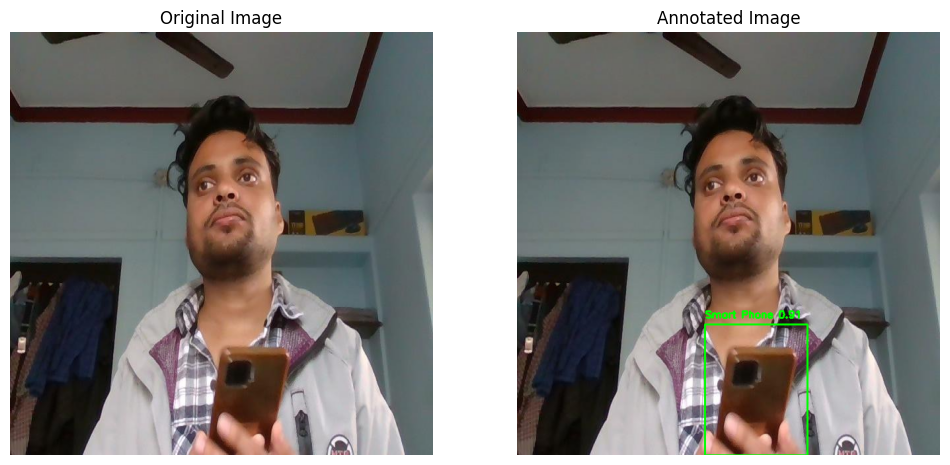

In [ ]:

#visualization of the  model in new image

import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO  # Ensure you import YOLO

# # Load YOLO model
model = YOLO('/content/drive/MyDrive/yoloDataset/resut2/weights/last.pt')  # Adjust model file if using a different version

# Select device (GPU if available)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Load the image for annotation
image_path = '/content/drive/MyDrive/yoloDataset/dataset/test/images/Phone_825673a2-edd6-11ef-b080-e0c26493e36e_jpg.rf.b2930d0981ada76290615f5db7740f3f.jpg'
original_image = cv2.imread(image_path)

# Ensure image is correctly loaded
if original_image is None:
    raise ValueError("Error loading image. Check the file path.")

original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Run prediction on the image
results = model_after_fine_tune.predict(
    source=image_path,
    conf=0.15,  # Confidence threshold
    iou=0.06,  # IoU threshold
    save=False,
    save_crop=False,
    device=device,  # Use selected device
)

# Class IDs
class_labels = {0: 'Book', 1: 'Smart Phone'}  # Define class labels
class_colors = {0: (255, 0, 0), 1: (0, 255, 0)}  # Red for book, green for phone

# Copy original image for annotation
annotated_image = original_image.copy()

# Annotate the image
for result in results:
    # **Fix: Clone tensors before converting to NumPy**
    class_ids = result.boxes.cls.clone().cpu().numpy().astype(int) if isinstance(result.boxes.cls, torch.Tensor) else np.array(result.boxes.cls, dtype=int)
    boxes = result.boxes.xyxy.clone().cpu().numpy() if isinstance(result.boxes.xyxy, torch.Tensor) else np.array(result.boxes.xyxy)
    confidences = result.boxes.conf.clone().cpu().numpy() if isinstance(result.boxes.conf, torch.Tensor) else np.array(result.boxes.conf)

    print(f"Detected classes: {class_ids.tolist()}")  # Debugging

    for box, cls, conf in zip(boxes, class_ids, confidences):
        xmin, ymin, xmax, ymax = map(int, box.tolist())
        class_id = int(cls)

        # Ensure class_id exists in dictionary, otherwise default to unknown
        label = class_labels.get(class_id, "Unknown")
        color = class_colors.get(class_id, (0, 0, 255))  # Default to blue for unknown

        # Draw bounding box and label
        cv2.rectangle(annotated_image, (xmin, ymin), (xmax, ymax), color, 2)
        cv2.putText(annotated_image, f'{label} {conf:.2f}', (xmin, ymin - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Display input and annotated images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(annotated_image)
axes[1].set_title("Annotated Image")
axes[1].axis("off")

plt.show()

